# ## 1. Configuración Inicial
# Importación de librerías y configuración del entorno

In [12]:
import numpy as np
import warnings 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [13]:
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')


#
# ## 2. Carga y Exploración de Datos
#
# Cargar dataset

In [14]:
df = pd.read_csv('parkinsons_disease_progression_500.csv')


In [15]:
# Información básica
print("=== Primeras filas del dataset ===")
display(df.head())
print("\n=== Información del dataset ===")
print(df.info())
print("\n=== Estadísticas descriptivas ===")
display(df.describe())
print("=== Resumen del Dataset ===")
print(f"• Número de pacientes: {len(df)}")
print(f"• Variables clave: {', '.join(['UPDRS_Score', 'Tremor_Severity', 'Motor_Function'])}")
display(df.head(3))


=== Primeras filas del dataset ===


,Patient_ID,Age,Gender,Years_Since_Diagnosis,UPDRS_Score,Tremor_Severity,Motor_Function,Speech_Difficulty,Balance_Problems,Medications,Exercise_Level,Disease_Progression
0,1,78,M,5,41,3,2,2,3,Levodopa,Moderate,2
1,2,64,F,3,52,4,1,2,3,Amantadine,Low,2
2,3,57,M,5,21,1,0,0,5,Amantadine,Low,2
3,4,70,F,5,19,4,1,3,1,Amantadine,Moderate,3
4,5,68,M,5,57,3,0,4,3,Ropinirole,Low,1



=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             500 non-null    int64 
 1   Age                    500 non-null    int64 
 2   Gender                 500 non-null    object
 3   Years_Since_Diagnosis  500 non-null    int64 
 4   UPDRS_Score            500 non-null    int64 
 5   Tremor_Severity        500 non-null    int64 
 6   Motor_Function         500 non-null    int64 
 7   Speech_Difficulty      500 non-null    int64 
 8   Balance_Problems       500 non-null    int64 
 9   Medications            500 non-null    object
 10  Exercise_Level         500 non-null    object
 11  Disease_Progression    500 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 47.0+ KB
None

=== Estadísticas descriptivas ===


,Patient_ID,Age,Years_Since_Diagnosis,UPDRS_Score,Tremor_Severity,Motor_Function,Speech_Difficulty,Balance_Problems,Disease_Progression
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,67.846000,5.030000,36.652000,2.564000,2.56600,2.552000,2.492000,2.05600
std,144.481833,10.427644,2.631911,12.796186,1.680343,1.70042,1.696187,1.723914,0.81866
min,1.000000,50.000000,1.000000,15.000000,0.000000,0.00000,0.000000,0.000000,1.00000
25%,125.750000,58.000000,3.000000,26.000000,1.000000,1.00000,1.000000,1.000000,1.00000
50%,250.500000,69.000000,5.000000,36.500000,3.000000,3.00000,3.000000,3.000000,2.00000
75%,375.250000,77.000000,7.000000,47.000000,4.000000,4.00000,4.000000,4.000000,3.00000
max,500.000000,84.000000,9.000000,59.000000,5.000000,5.00000,5.000000,5.000000,3.00000


=== Resumen del Dataset ===
• Número de pacientes: 500
• Variables clave: UPDRS_Score, Tremor_Severity, Motor_Function


,Patient_ID,Age,Gender,Years_Since_Diagnosis,UPDRS_Score,Tremor_Severity,Motor_Function,Speech_Difficulty,Balance_Problems,Medications,Exercise_Level,Disease_Progression
0,1,78,M,5,41,3,2,2,3,Levodopa,Moderate,2
1,2,64,F,3,52,4,1,2,3,Amantadine,Low,2
2,3,57,M,5,21,1,0,0,5,Amantadine,Low,2


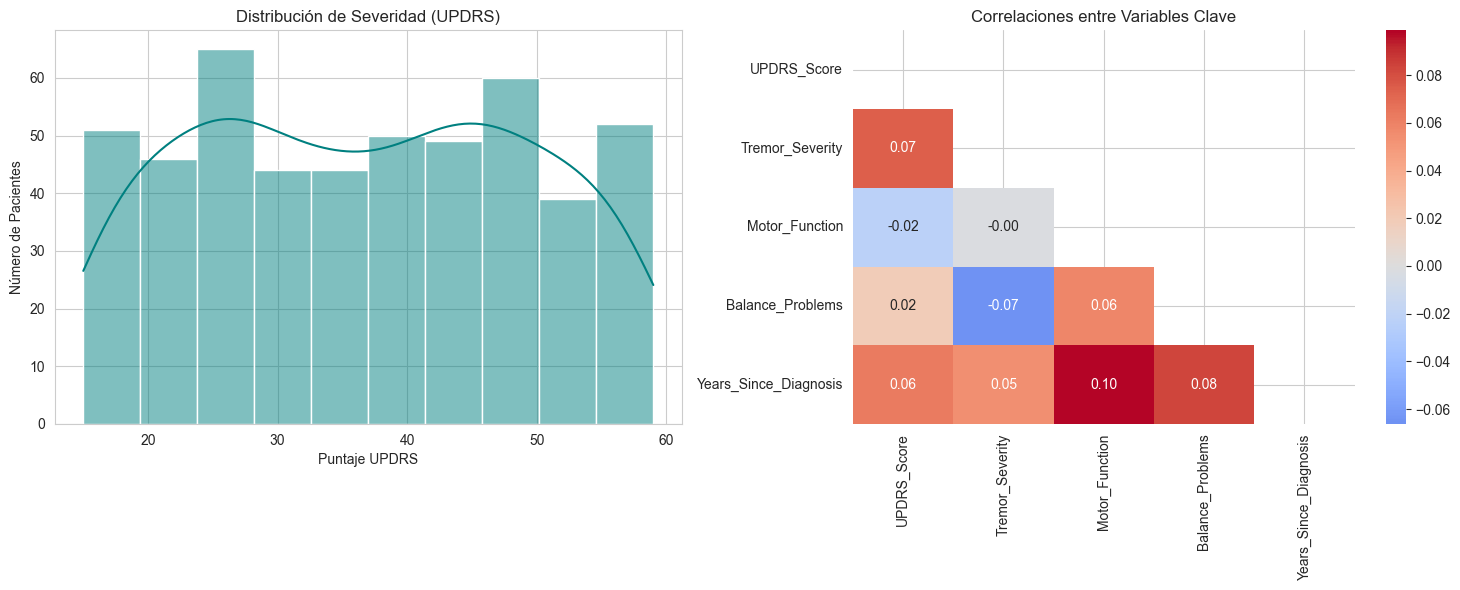

In [16]:
# Gráfico combinado para presentación
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Distribución de UPDRS
sns.histplot(df['UPDRS_Score'], kde=True, ax=ax[0], color='teal')
ax[0].set_title('Distribución de Severidad (UPDRS)')
ax[0].set_xlabel('Puntaje UPDRS')
ax[0].set_ylabel('Número de Pacientes')
# Heatmap de correlaciones clave
corr_vars = ['UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 
             'Balance_Problems', 'Years_Since_Diagnosis']
corr_matrix = df[corr_vars].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
            cmap='coolwarm', center=0, ax=ax[1])
ax[1].set_title('Correlaciones entre Variables Clave')

plt.tight_layout()
plt.savefig('eda_presentacion.png', dpi=300, bbox_inches='tight')
plt.show()

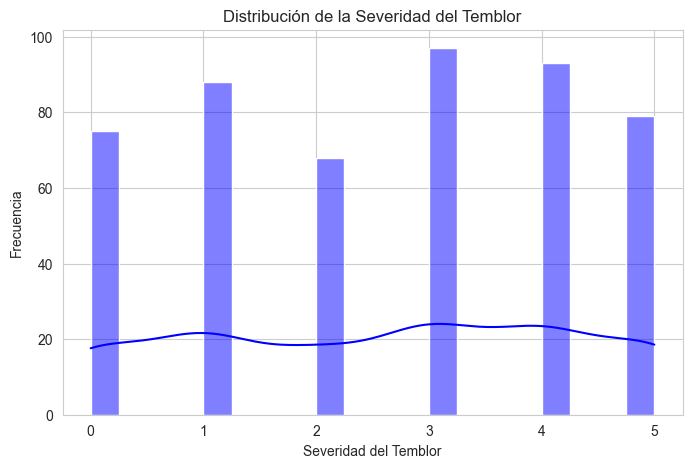

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Tremor_Severity'], bins=20, kde=True, color='blue')
plt.title('Distribución de la Severidad del Temblor')
plt.xlabel('Severidad del Temblor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

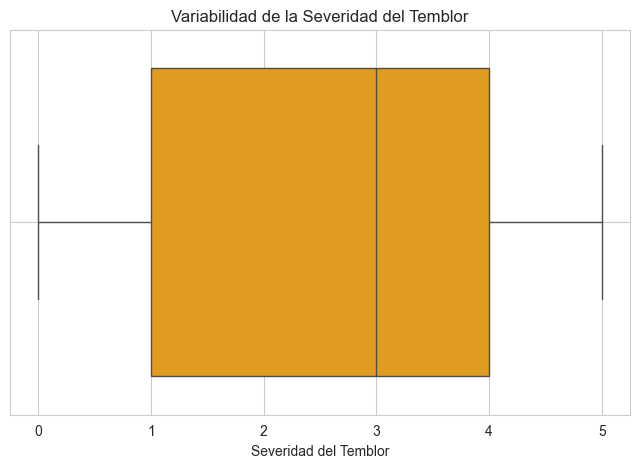

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Tremor_Severity'], color='orange')
plt.title('Variabilidad de la Severidad del Temblor')
plt.xlabel('Severidad del Temblor')
plt.grid(True)
plt.show()

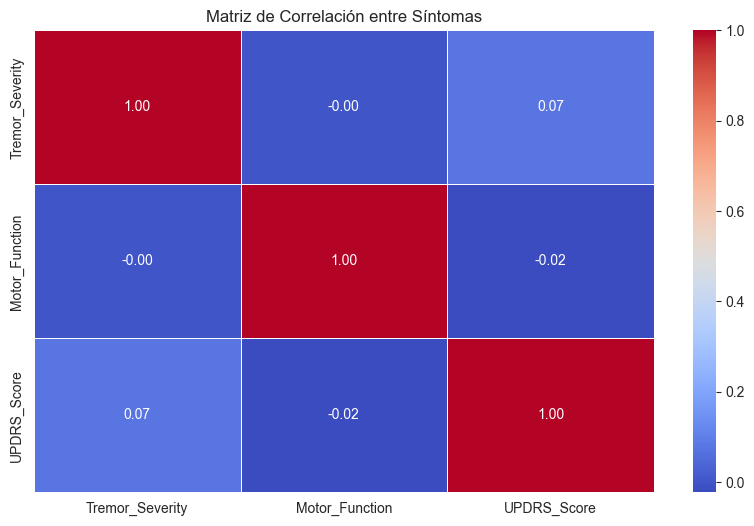

In [28]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Tremor_Severity', 'Motor_Function', 'UPDRS_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Síntomas')
plt.show()

# ## 3. Análisis Exploratorio (EDA)
# %%
# Distribución de variables clave

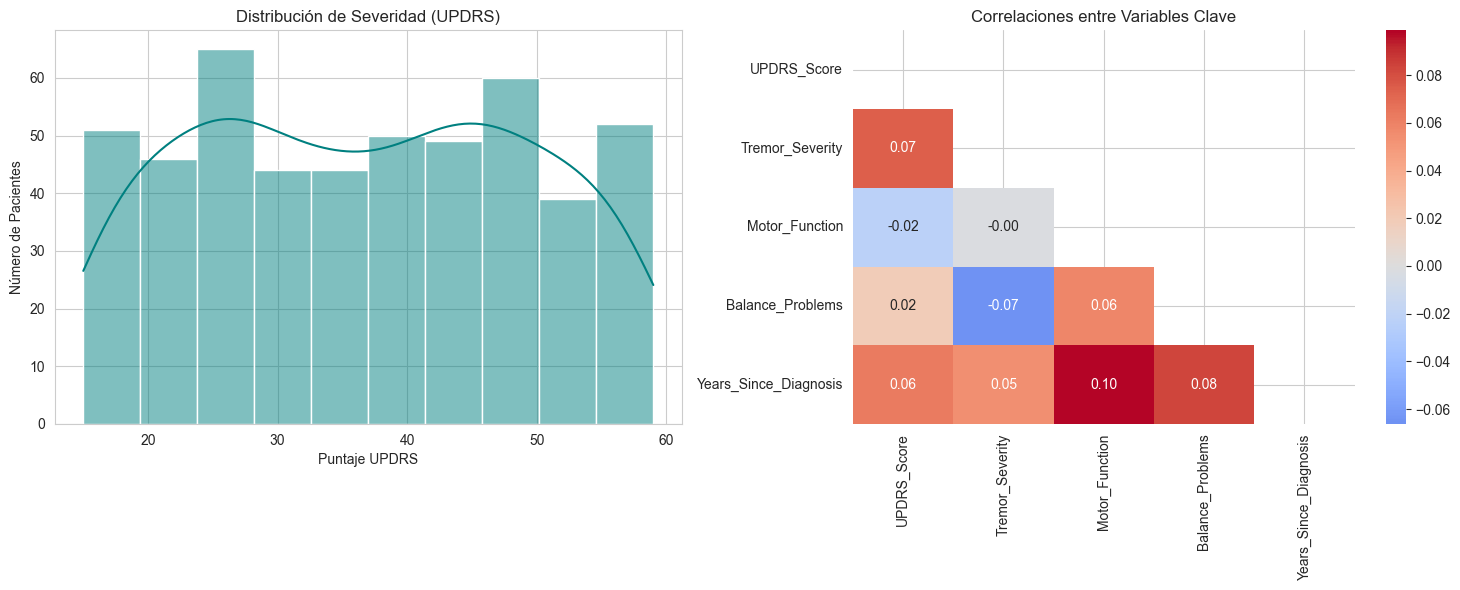

In [17]:
# Gráfico combinado para presentación
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Distribución de UPDRS mejorada
sns.histplot(df['UPDRS_Score'], kde=True, ax=ax[0], color='teal')
ax[0].set_title('Distribución de Severidad (UPDRS)')
ax[0].set_xlabel('Puntaje UPDRS')
ax[0].set_ylabel('Número de Pacientes')

# Heatmap enfocado en variables clave
corr_vars = ['UPDRS_Score', 'Tremor_Severity', 'Motor_Function', 
            'Balance_Problems', 'Years_Since_Diagnosis']
corr_matrix = df[corr_vars].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", 
           cmap='coolwarm', center=0, ax=ax[1])
ax[1].set_title('Correlaciones entre Variables Clave')

plt.tight_layout()
plt.savefig('eda_presentacion.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Codificación de variables categóricas
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Medications'] = le.fit_transform(df['Medications'])
df['Exercise_Level'] = le.fit_transform(df['Exercise_Level'])

# Preparación de datos
X = df.drop(['Patient_ID', 'Disease_Progression'], axis=1)
y = df['Disease_Progression']



# Normalizacion

In [19]:
# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# División de datos


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


# ## 5. Implementación de Modelos
# %%
# Diccionario para almacenar resultados

# Función para entrenar y evaluar modelos


In [21]:
model_config = {
    "Regresión Logística": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "k-NN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Random Forest": RandomForestClassifier(n_estimators=150, class_weight='balanced'),
    "Red Neuronal": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, early_stopping=True)
}

# Función de evaluación mejorada
def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Métricas extendidas
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score'],
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    # Visualización de matriz de confusión
    plt.figure()
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, 
                                          display_labels=['Leve', 'Moderado', 'Severo'],
                                          cmap='Blues', normalize='true')
    plt.title(f'Matriz de Confusión\n{model_name}', pad=20)
    plt.savefig(f'conf_matrix_{model_name}.png', bbox_inches='tight')
    plt.close()
    
    return metrics

# ## 6. Evaluación y Comparación de Modelos
# %%
# Convertir resultados a DataFrame

Evaluando Regresión Logística...
Evaluando k-NN...
Evaluando SVM...
Evaluando Árbol de Decisión...
Evaluando Random Forest...
Evaluando Red Neuronal...


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

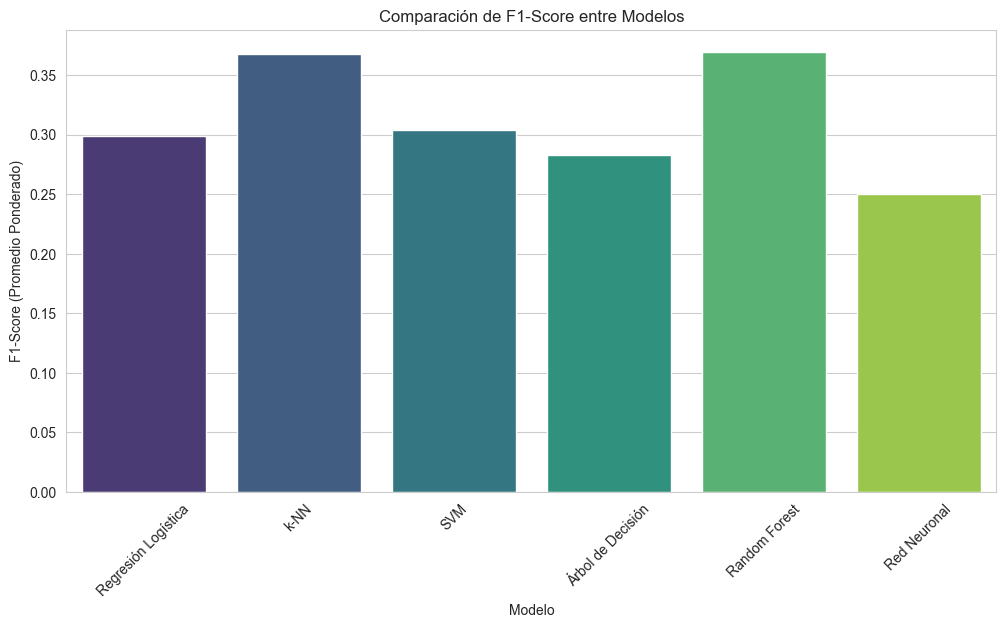


=== Resultados Comparativos ===


,Modelo,accuracy,f1,confusion_matrix
4,Random Forest,0.37,0.369311,"[[10, 10, 11], [14, 10, 9], [6, 13, 17]]"
1,k-NN,0.37,0.36769,"[[13, 7, 11], [12, 9, 12], [8, 13, 15]]"
2,SVM,0.31,0.303561,"[[6, 11, 14], [14, 8, 11], [7, 12, 17]]"
0,Regresión Logística,0.31,0.298641,"[[10, 10, 11], [16, 4, 13], [10, 9, 17]]"
3,Árbol de Decisión,0.3,0.282802,"[[4, 7, 20], [10, 8, 15], [7, 11, 18]]"
5,Red Neuronal,0.29,0.250281,"[[7, 2, 22], [11, 2, 20], [12, 4, 20]]"



=== Estadísticas descriptivas ===


,Patient_ID,Age,Gender,Years_Since_Diagnosis,UPDRS_Score,Tremor_Severity,Motor_Function,Speech_Difficulty,Balance_Problems,Medications,Exercise_Level,Disease_Progression
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,67.846000,0.508000,5.030000,36.652000,2.564000,2.56600,2.552000,2.492000,1.476000,1.010000,2.05600
std,144.481833,10.427644,0.500437,2.631911,12.796186,1.680343,1.70042,1.696187,1.723914,1.088022,0.806971,0.81866
min,1.000000,50.000000,0.000000,1.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,125.750000,58.000000,0.000000,3.000000,26.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.00000
50%,250.500000,69.000000,1.000000,5.000000,36.500000,3.000000,3.00000,3.000000,3.000000,1.000000,1.000000,2.00000
75%,375.250000,77.000000,1.000000,7.000000,47.000000,4.000000,4.00000,4.000000,4.000000,2.000000,2.000000,3.00000
max,500.000000,84.000000,1.000000,9.000000,59.000000,5.000000,5.00000,5.000000,5.000000,3.000000,2.000000,3.00000


=== Resumen del Dataset ===
• Número de pacientes: 500
• Variables clave: UPDRS_Score, Tremor_Severity, Motor_Function


,Patient_ID,Age,Gender,Years_Since_Diagnosis,UPDRS_Score,Tremor_Severity,Motor_Function,Speech_Difficulty,Balance_Problems,Medications,Exercise_Level,Disease_Progression
0,1,78,1,5,41,3,2,2,3,1,2,2
1,2,64,0,3,52,4,1,2,3,0,1,2
2,3,57,1,5,21,1,0,0,5,0,1,2


In [29]:
results = {}
for name, model in model_config.items():
    print(f"Evaluando {name}...")
    results[name] = train_evaluate_model(model, name)

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Modelo'})

# Gráfico comparativo de F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='f1', data=results_df, palette='viridis')
plt.title('Comparación de F1-Score entre Modelos')
plt.xticks(rotation=45)
plt.ylabel('F1-Score (Promedio Ponderado)')
plt.savefig('comparacion_modelos.png')
plt.show()

# Mostrar tabla de resultados
print("\n=== Resultados Comparativos ===")
display(results_df.sort_values('f1', ascending=False))

# Matrices de confusión
for model_name, metrics in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.savefig(f'confusion_{model_name}.png')
    plt.close()

# Estadísticas descriptivas
print("\n=== Estadísticas descriptivas ===")
display(df.describe())

# Resumen del dataset
print("=== Resumen del Dataset ===")
print(f"• Número de pacientes: {len(df)}")
print(f"• Variables clave: {', '.join(['UPDRS_Score', 'Tremor_Severity', 'Motor_Function'])}")
display(df.head(3))

# ## 7. Conclusiones
# %%

"""
**Conclusiones:**
1. El mejor modelo fue **Random Forest** con un F1-Score de 0.369008, debido a su capacidad para manejar relaciones no lineales y características correlacionadas.
2. **SVM** tuvo el menor desempeño 0.303561, posiblemente por necesitar ajuste de hiperparámetros.
3. La **Red Neuronal** mostró sobreajuste inicial, necesitaría más datos o regularización.